## Updates
- finishing geometric calibration and verifying it.

In [9]:
from calibration.intrinsic_calibration import *
from calibration.geometric_calibration import *

import matplotlib.pyplot as plt
import cv2

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|███████████████████████████████████████████| 14/14 [00:00<00:00, 15.10it/s]


NumImg: 14
Rep Error: 0.4654915944377311
Camera Matrix: [[1.51640818e+03 0.00000000e+00 7.15659831e+02]
 [0.00000000e+00 1.51909396e+03 9.68556014e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
disCoeffs:  [[ 1.15865731e+01  2.41782193e+01 -9.12286909e-05 -1.18574257e-03
  -1.06193828e+02  1.11812975e+01  2.43752277e+01 -1.04667810e+02
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]
ret:  0.4654915944377311


100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  6.00it/s]


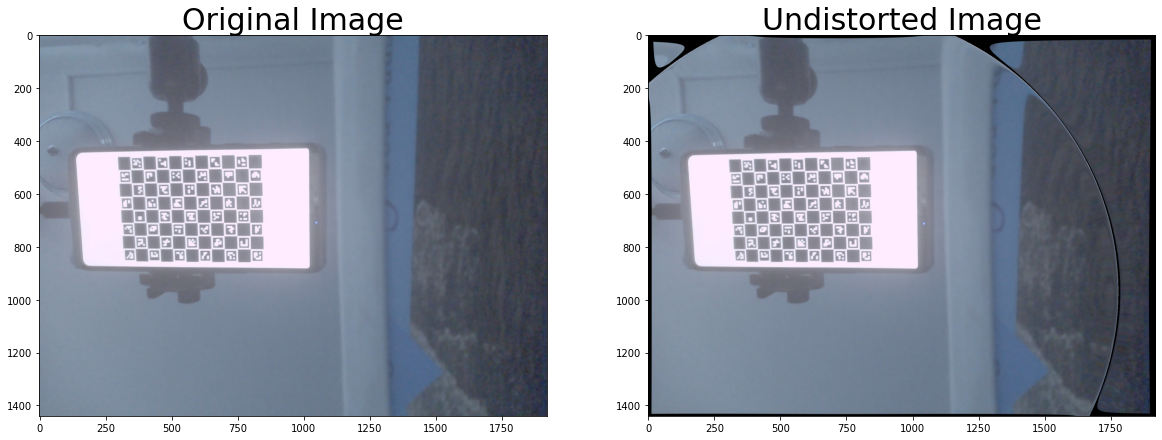

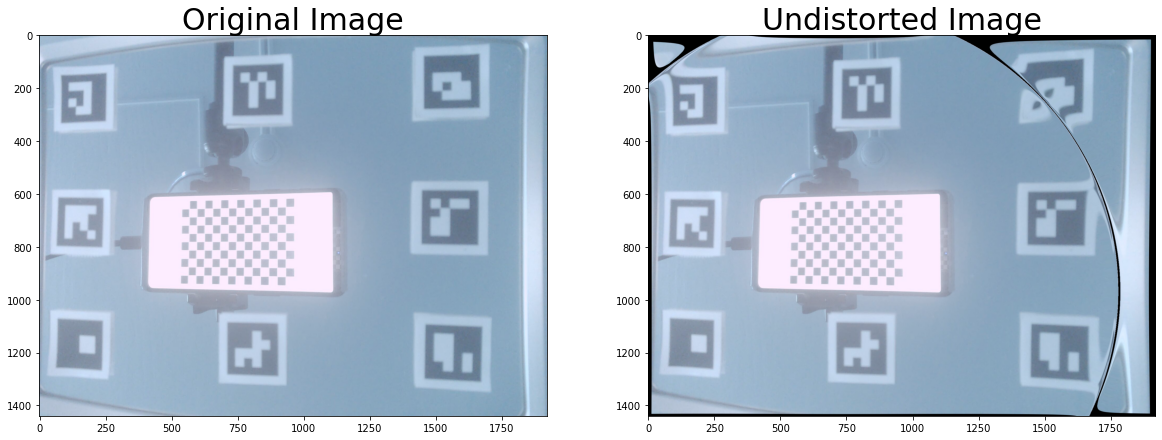

In [10]:
intrinsic_calib = IntrinsicCalibration(dict_aruco=cv2.aruco.DICT_4X4_250, sqWidth=10, sqHeight=7, checkerSquareSize=0.025, markerSquareSize=0.01926)
    
intrinsic_calib.calibration(imgFolder="./data/capture_intrinsic/", imgPattern="*.jpg") # intrinsic calibration
intrinsic_calib.undistort(imgFolder="./data/capture_geometric/", imgPattern="*.jpg") # undistort other imgs from different folder based on intrinsic calibration result

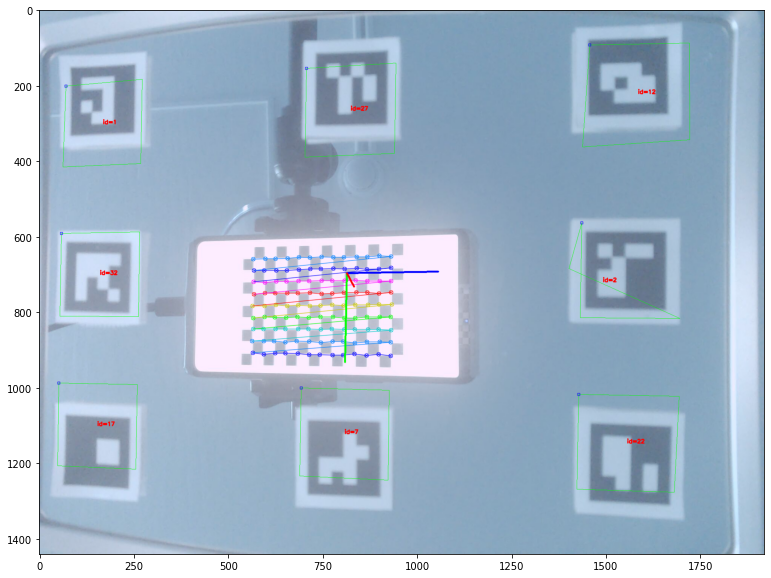

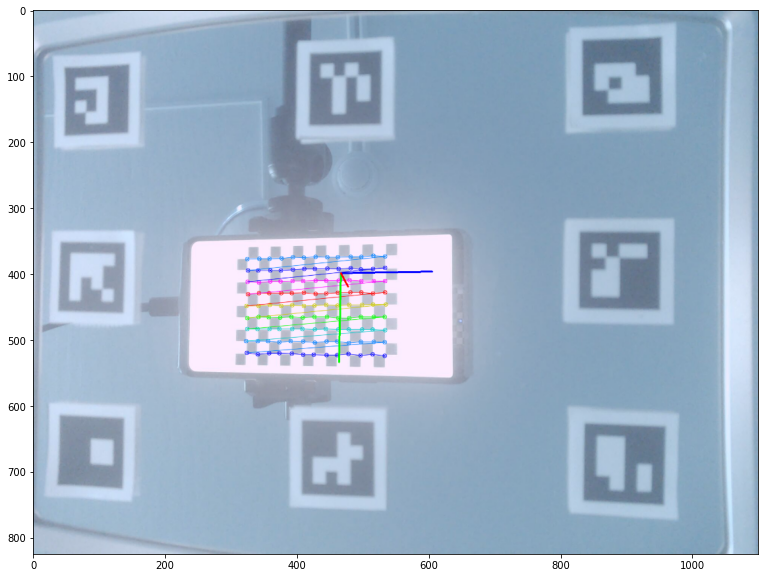

[[ 0.00556123]
 [-0.03559794]
 [ 0.29250458]]
rC2S: [[ 0.99800443  0.02541867 -0.05780186]
 [ 0.02763467 -0.99890059  0.03786727]
 [ 0.05677578  0.03938904  0.99760965]]
tC2S: [ 0.04594892 -0.03227113  0.05273764]


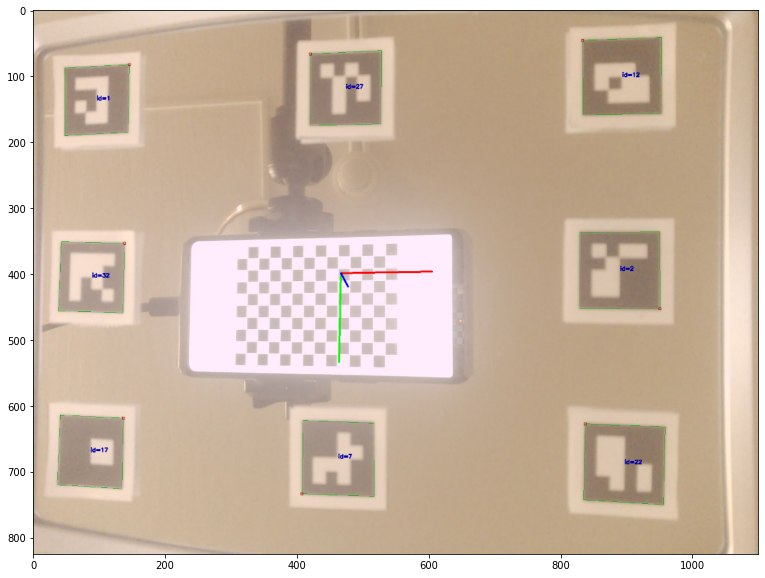

cam z axis in world coor:  [-0.15491731  0.00314471  0.98792243]
cam zero point in world coor:  [ 0.01102533  0.02061326 -0.11714065]
display z axis in world coor:  [-0.09775178  0.04150554  0.99434495]
display zero in world coor:  [-0.0294411  -0.01415832 -0.17270496]


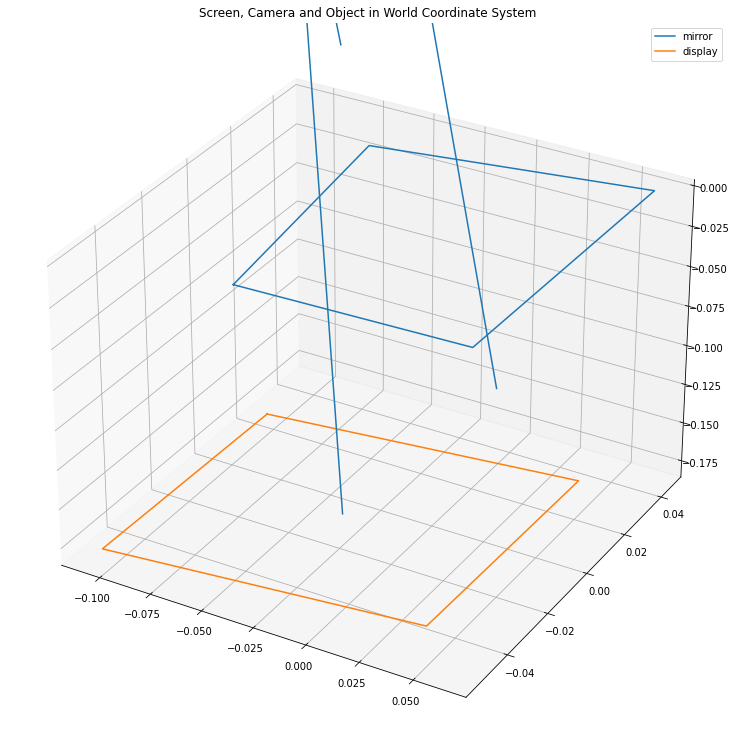

In [11]:
half_length = 0.0625 # 6.75cm
half_height = 0.0415 # 4.65cm
marker_size = 0.018  # 18mm
displayScaleFactor = 0.006 / 85
geoCalibImgFile = "./data/capture_geometric/geoCali.jpg"
geoCalibImgUndistortFile = "./data/capture_geometric/undistort/geoCali.jpg"
checker_col_row = np.array([13,9])
displayintersect, camdisintersect, rc2s, tc2s = geoCalib(geoCalibImgFile, geoCalibImgUndistortFile, half_length, half_height, marker_size, 
                                                            intrinsic_calib.cameraMatrix, intrinsic_calib.distortionCoeff, intrinsic_calib.ret, 
                                                            displayScaleFactor, checker_col_row)

<Figure size 1080x720 with 0 Axes>

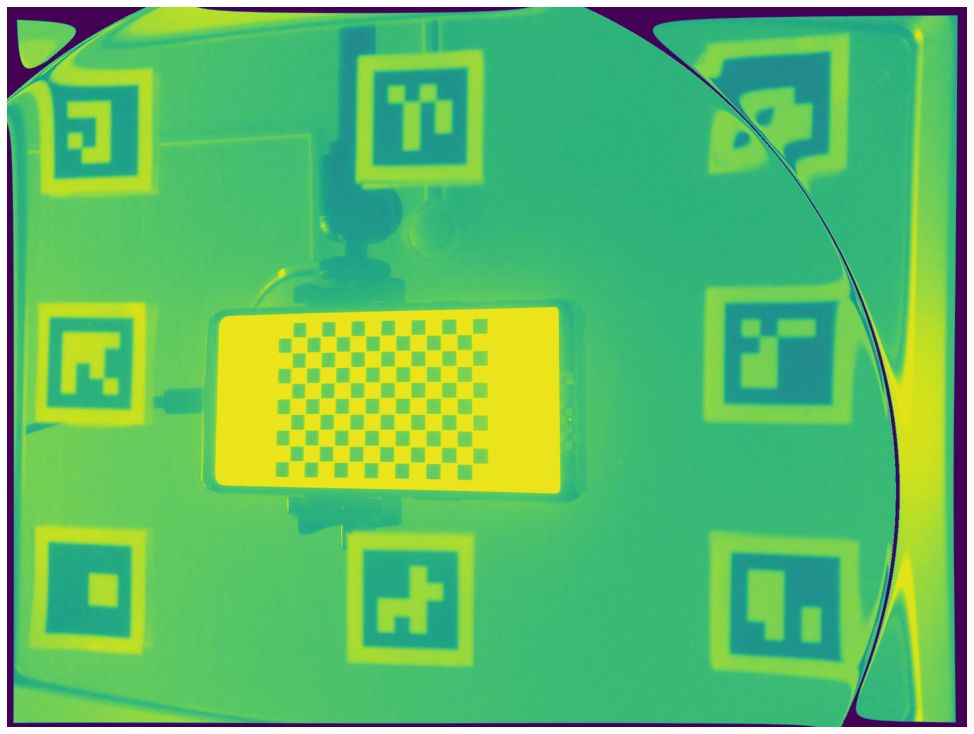

(1440, 1920)


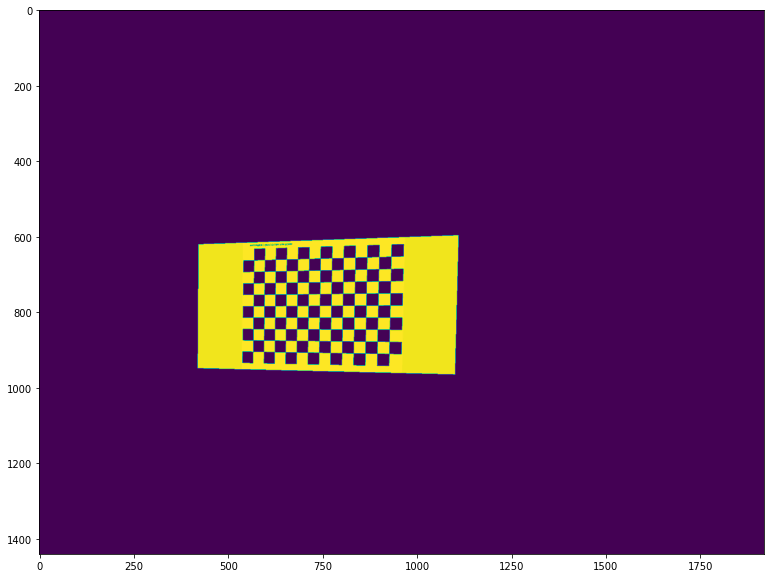

Rep Error: 3.2582567


<Figure size 1080x720 with 0 Axes>

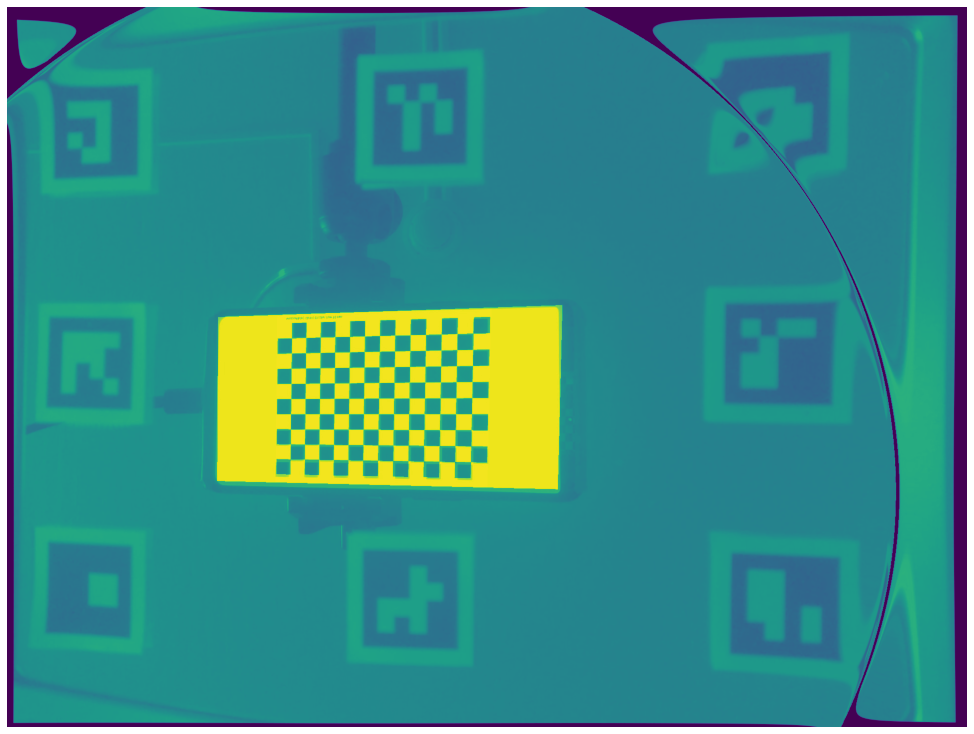

In [12]:
geo_calib_validation(geoCalibImgUndistortFile, displayintersect, displayScaleFactor, checker_col_row)